In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mlbeats # python file that include usful functions
from biosppy.signals import ecg
import tensorflow as tf
import keras

In [31]:
#import dataset and annotations into a pandas dataframe
df = pd.read_csv("mitbih_database/101.csv")
annotations = mlbeats.df_from_txt("mitbih_database/101annotations.txt")

#preview of how the dataframe looks
annotations.head()

,Time,Sample#,Result
0,0:00.019,7,+
1,0:00.231,83,N
2,0:01.100,396,N
3,0:01.975,711,N
4,0:02.867,1032,N


(320000.0, 330000.0)

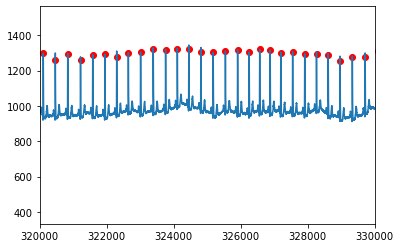

In [32]:
#preview of how the plot looks
plt.plot(df["\'sample #\'"], df["\'MLII\'"])

rpeak = []#the list that store the location of peaks
for i in range(len(annotations['Sample#'])):
    x = int(annotations['Sample#'][i])
    plt.scatter(x, df["\'MLII\'"][x], color = 'red')
    rpeak.append(x)
plt.xlim(320000, 330000)


In [34]:
#data normalization
mx = np.amax(df["\'MLII\'"])
mn = np.amin(df["\'MLII\'"])

normalized_data = (df["\'MLII\'"] - mn)/(mx - mn)

#data denoising

denoised_data = mlbeats.denoising(normalized_data)


In [52]:
#ts, filtered, rpeaks, beats_ts, beats, heart_rate_ts, heart_rate = ecg.ecg(signal=denoised_data, sampling_rate=360, show=False)
#ts1, filtered1, rpeaks1, beats_ts1, beats1, heart_rate_ts1, heart_rate1 = ecg.ecg(signal=normalized_data, sampling_rate=360, show=False)

beats, rpeak = ecg.extract_heartbeats(signal=denoised_data, rpeaks=rpeak, sampling_rate=360, before=0.4, after=0.5)
beats1, rpeak1 = ecg.extract_heartbeats(signal=normalized_data, rpeaks=rpeak, sampling_rate=360, before=0.4, after=0.5)

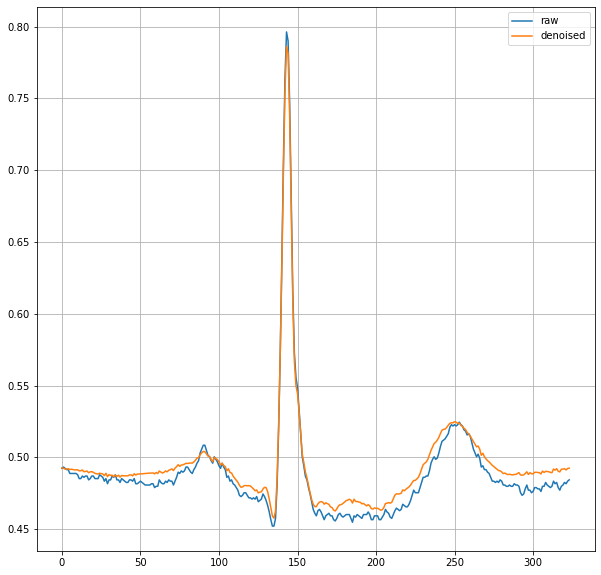

In [56]:
plt.figure(figsize = [10, 10])
x=345
xaxis = np.arange(0, len(beats[x]), 1)
y = beats[x]
my_y = beats1[x]
plt.plot(xaxis, my_y, label = "raw")
plt.plot(xaxis, y, label = "denoised")
plt.grid()
plt.legend()
plt.show() 

No handles with labels found to put in legend.


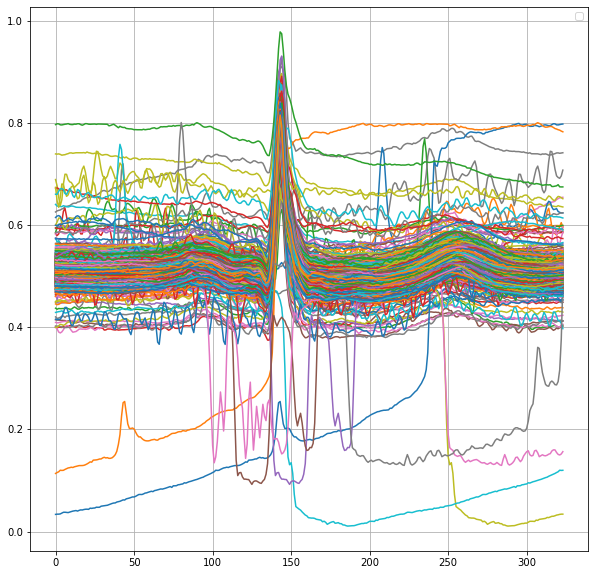

In [55]:
plt.figure(figsize = [10, 10])
for x in range(len(beats)):
    xaxis = np.arange(0, len(beats[x]), 1)
    #y = beats[x]
    my_y = beats[x]
    #plt.plot(xaxis, y)
    plt.plot(xaxis, my_y)
plt.grid()
plt.show() 

In [47]:
print(beats)

[[0.01627265 0.01601637 0.01580003 ... 0.01795127 0.01830508 0.0186025 ]
 [0.02003898 0.02040532 0.020633   ... 0.0162029  0.01644339 0.01671179]
 [0.02110402 0.02153093 0.02185599 ... 0.01635848 0.01635261 0.01637753]
 ...
 [0.02243188 0.02297263 0.02358812 ... 0.01605868 0.01643117 0.01686876]
 [0.0196555  0.0201598  0.02057536 ... 0.01940218 0.01892136 0.0185026 ]
 [0.0200984  0.02094758 0.02181915 ... 0.01703615 0.01693918 0.01683885]]


In [13]:
#make beat_annotation data frame
beat_annotation = pd.DataFrame(beats)
label = annotations['Result'].iloc[1:]
beat_annotation.insert(0, "Annotation", label)

NameError: name 'beats' is not defined

In [12]:
beat_annotation.head()

,Annotation,0,1,2,3,4,5,6,7,8,...,206,207,208,209,210,211,212,213,214,215
0,NaN,-0.002659,-0.002167,-0.001560,-0.000890,-0.000365,0.000030,0.000289,0.000445,0.000643,...,-0.013105,-0.013555,-0.013913,-0.014029,-0.013699,-0.013183,-0.012812,-0.012695,-0.013090,-0.013731
1,N,-0.010110,-0.010378,-0.010833,-0.010699,-0.009985,-0.008593,-0.006858,-0.005628,-0.005033,...,-0.007935,-0.007956,-0.007902,-0.007844,-0.007824,-0.007811,-0.007940,-0.008353,-0.008853,-0.009164
2,N,0.004333,0.005851,0.007136,0.008189,0.009203,0.009951,0.010240,0.010219,0.010019,...,-0.005907,-0.006583,-0.007282,-0.007884,-0.008239,-0.008457,-0.008653,-0.008829,-0.009060,-0.009224
3,N,-0.007260,-0.006220,-0.004818,-0.003411,-0.002025,-0.000819,0.000105,0.000767,0.000890,...,-0.010901,-0.011632,-0.012472,-0.013549,-0.014727,-0.015781,-0.016664,-0.017239,-0.017534,-0.017692
4,N,-0.015918,-0.014824,-0.013437,-0.011946,-0.010413,-0.009021,-0.007901,-0.007156,-0.007083,...,0.004351,0.004169,0.003789,0.003038,0.002033,0.001185,0.000395,-0.000346,-0.000975,-0.001599


1873